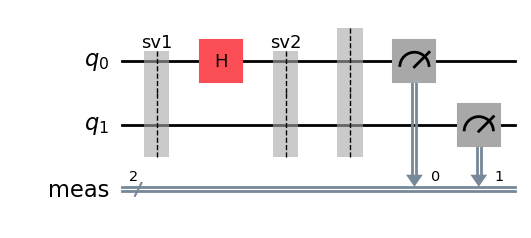

<IPython.core.display.Math object>

<IPython.core.display.Math object>

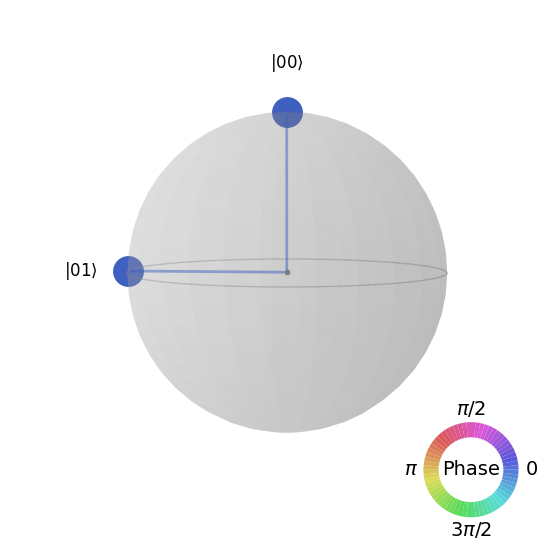

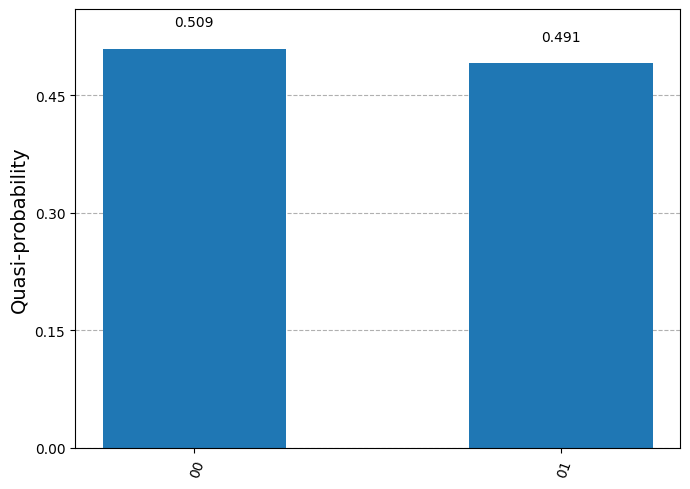

In [1]:
"""entanglement.ipynb"""

# Cell 01 - Two qubits NOT entangled

import numpy as np
from IPython.display import display
from qis101_utils import as_latex
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_bloch_multivector,
    plot_distribution,
    plot_state_qsphere,
)
from qiskit_aer import AerSimulator

qc = QuantumCircuit(2)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector("sv2")
qc.measure_all()

display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_state_qsphere(sv2))

counts = result.get_counts(qc)
display(plot_distribution(counts))

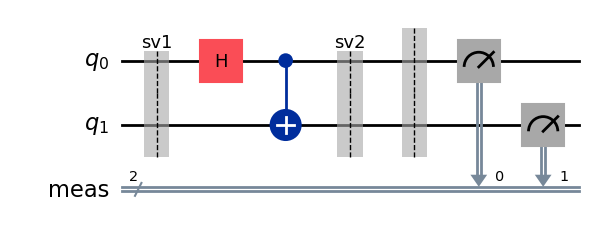

<IPython.core.display.Math object>

<IPython.core.display.Math object>

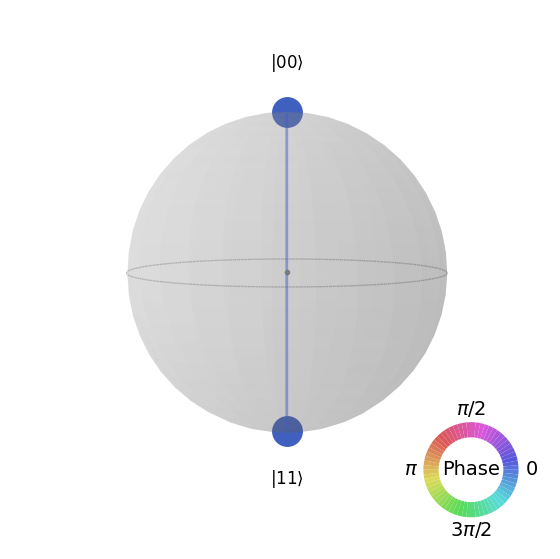

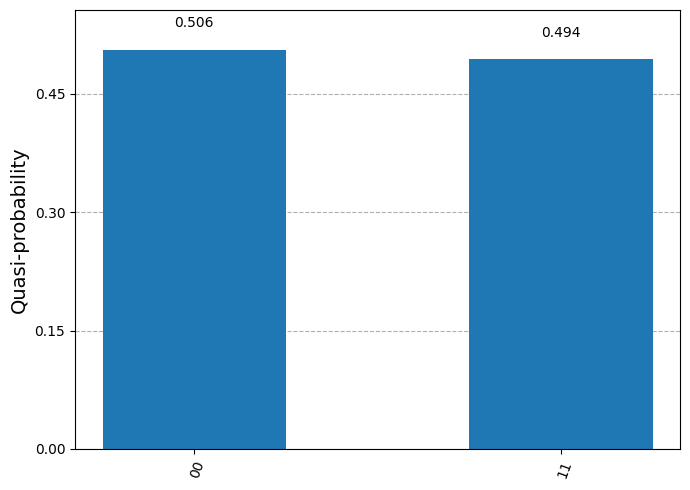

In [2]:
# Cell 02 - Two qubits ENTANGLED

qc = QuantumCircuit(2)
qc.save_statevector("sv1")
qc.h(0)
qc.cx(0, 1)
qc.save_statevector("sv2")
qc.measure_all()

display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_state_qsphere(sv2))

counts = result.get_counts(qc)
display(plot_distribution(counts))

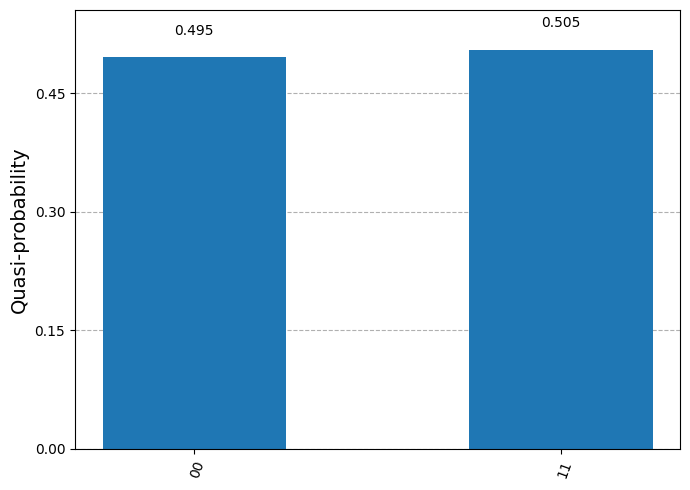

In [3]:
# Cell 03 - Two qubits ENTANGLED (use 10,000 shots)

qc = QuantumCircuit(2)
qc.save_statevector("sv1")
qc.h(0)
qc.cx(0, 1)
qc.save_statevector("sv2")
qc.measure_all()

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=10_000).result()

counts = result.get_counts(qc)
display(plot_distribution(counts))

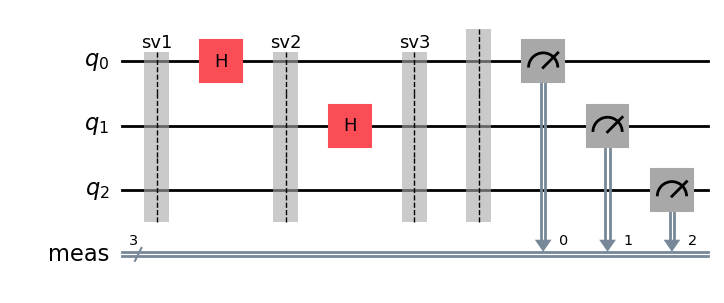

<IPython.core.display.Math object>

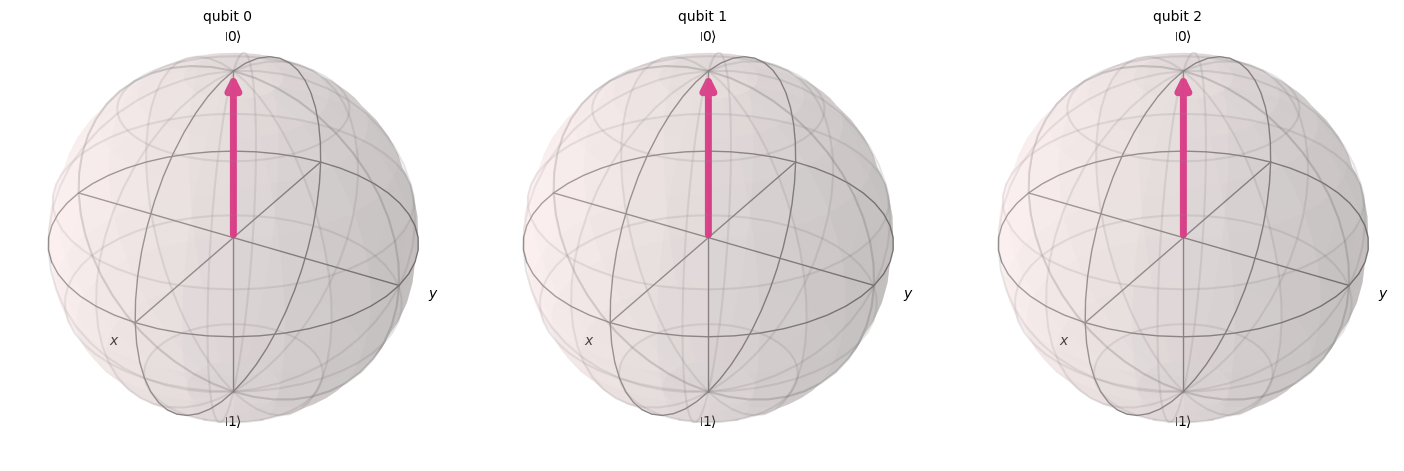

<IPython.core.display.Math object>

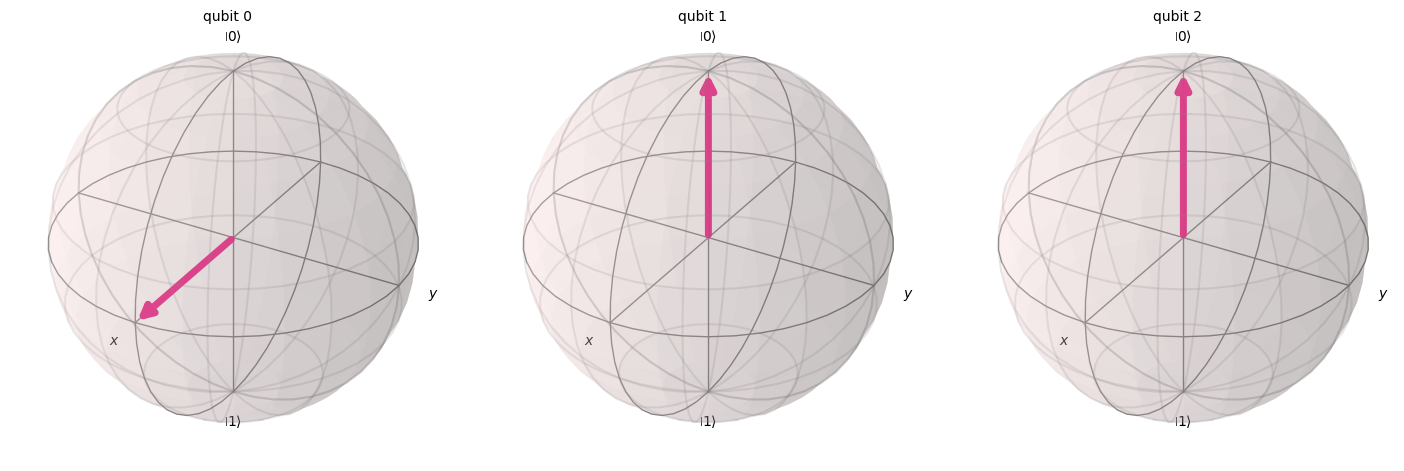

<IPython.core.display.Math object>

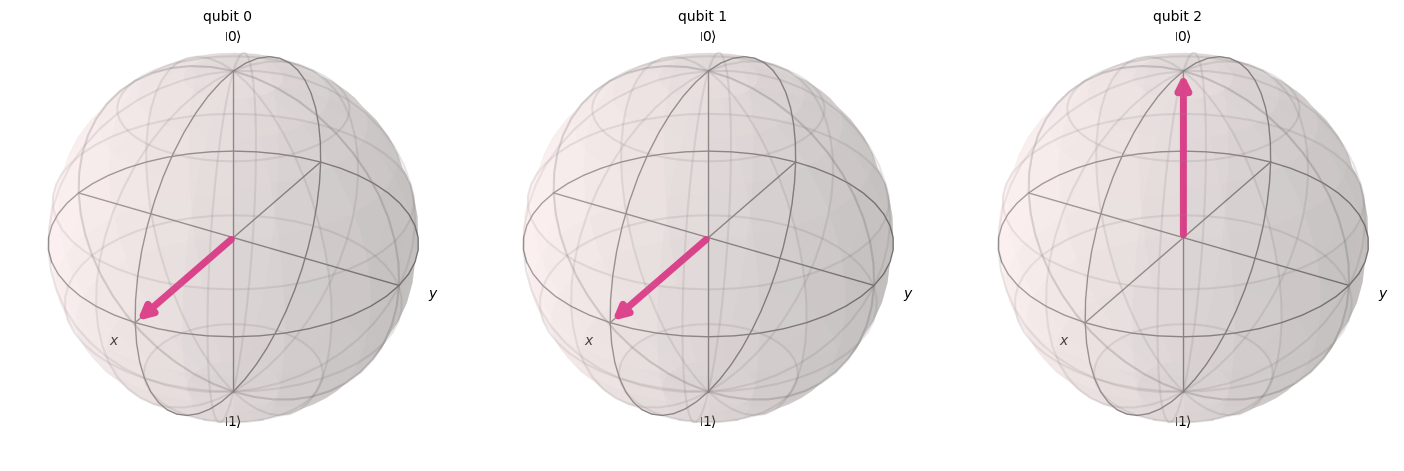

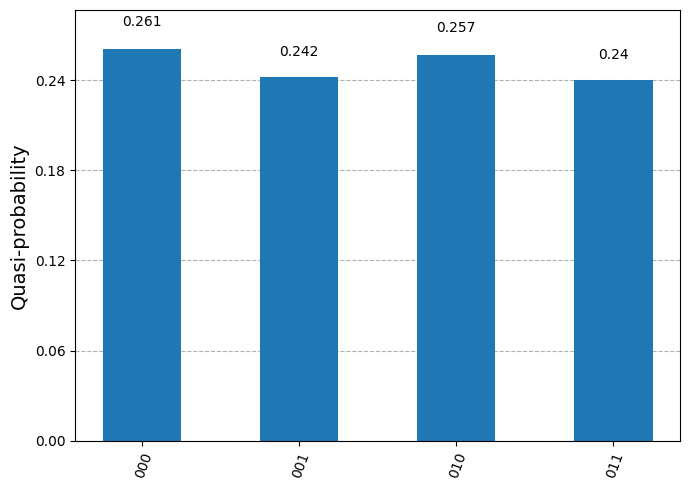

In [4]:
# Cell 04 - Three qubits NOT entangled

qc = QuantumCircuit(3)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector("sv2")
qc.h(1)
qc.save_statevector("sv3")
qc.measure_all()

display(qc.draw(output="mpl"))
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(plot_bloch_multivector(sv3))

counts = result.get_counts(qc)
display(plot_distribution(counts))

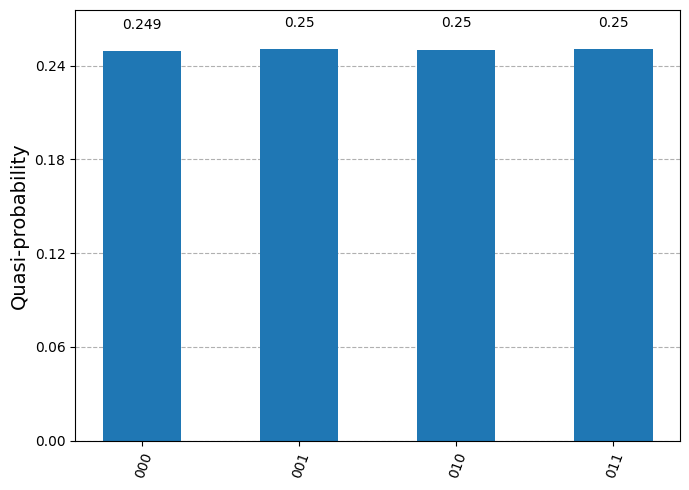

In [5]:
# Cell 05 - Three qubits NOT entangled (100,000 shots)

qc = QuantumCircuit(3)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector("sv2")
qc.h(1)
qc.save_statevector("sv3")
qc.measure_all()

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=1_000_000).result()

counts = result.get_counts(qc)
display(plot_distribution(counts))

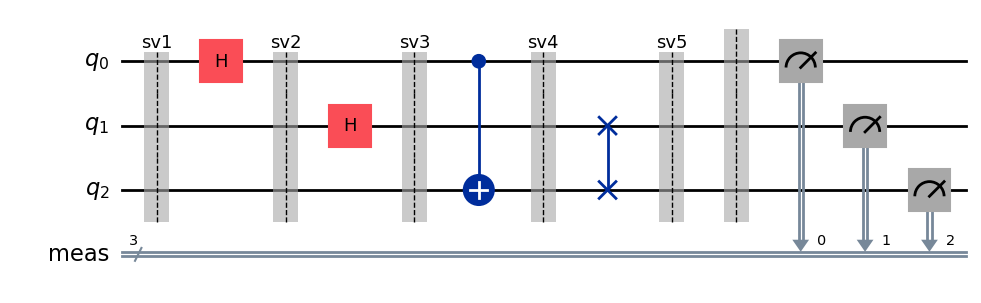

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

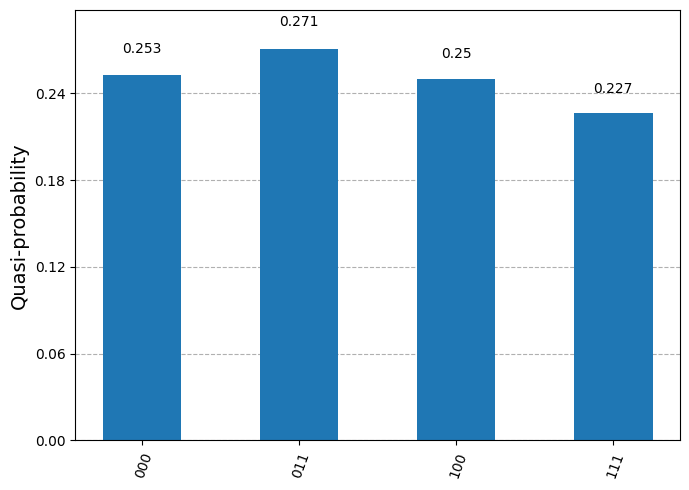

In [6]:
# Cell 06 - Three qubits ENTANGLED

qc = QuantumCircuit(3)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector("sv2")
qc.h(1)
qc.save_statevector("sv3")
qc.cx(0, 2)
qc.save_statevector("sv4")
qc.swap(1, 2)
qc.save_statevector("sv5")
qc.measure_all()

display(qc.draw(output="mpl"))
backend = AerSimulator()
qc_transpiled = transpile(qc, backend, optimization_level=1)
result = backend.run(qc_transpiled).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.data(0)["sv4"]
sv5 = result.data(0)["sv5"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))
display(as_latex(sv5, prefix=r"\mathbf{Statevector\;5}="))

counts = result.get_counts(qc)
display(plot_distribution(counts))

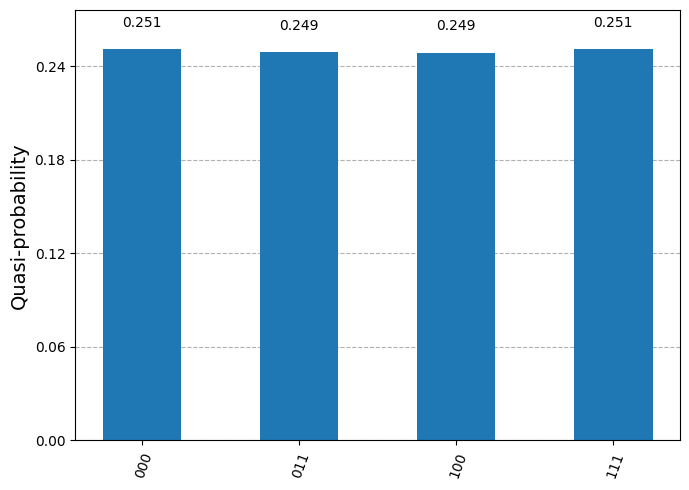

In [7]:
# Cell 07 - Three qubits ENTANGLED (100,000 shots)

qc = QuantumCircuit(3)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector("sv2")
qc.h(1)
qc.save_statevector("sv3")
qc.cx(0, 2)
qc.save_statevector("sv4")
qc.swap(1, 2)
qc.save_statevector("sv5")
qc.measure_all()

backend = AerSimulator()
qc_transpiled = transpile(qc, backend, optimization_level=1)
result = backend.run(qc_transpiled, shots=100_000).result()

counts = result.get_counts(qc)
display(plot_distribution(counts))

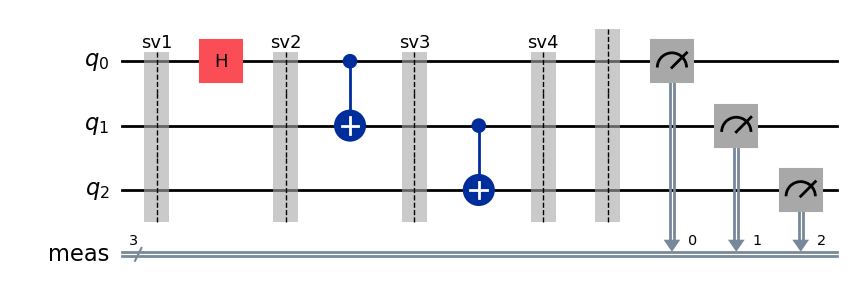

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

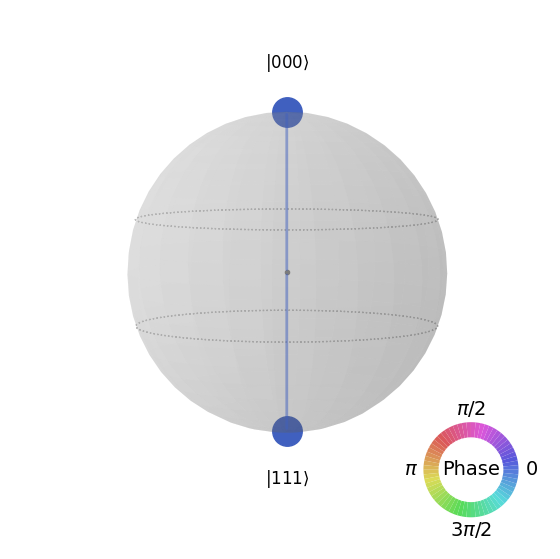

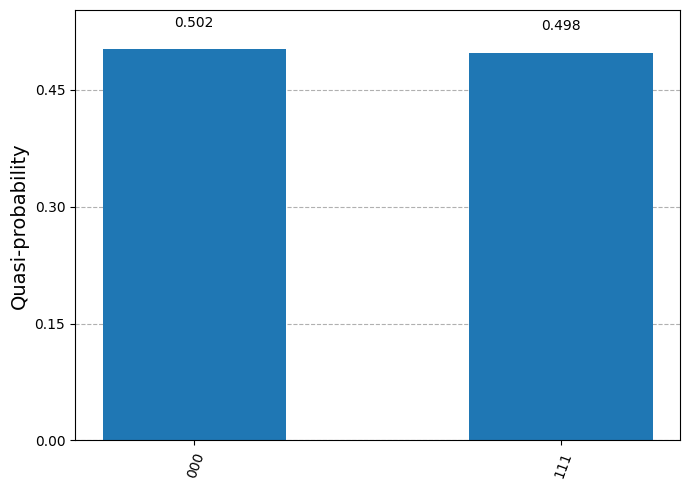

In [8]:
# Cell 08 - Greenberger–Horne–Zeilinger (GHZ)
# state (100,000 shots)

qc = QuantumCircuit(3)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector("sv2")
qc.cx(0, 1)
qc.save_statevector("sv3")
qc.cx(1, 2)
qc.save_statevector("sv4")
qc.measure_all()

display(qc.draw(output="mpl"))
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=100_000).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.data(0)["sv4"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))

display(plot_state_qsphere(sv4))

counts = result.get_counts(qc)
display(plot_distribution(counts))

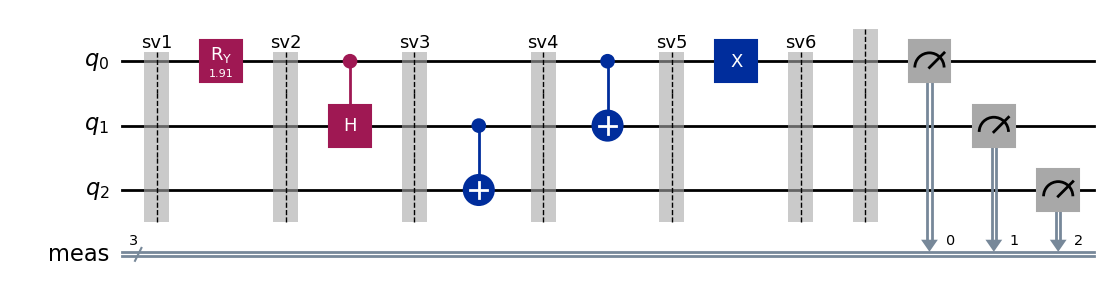

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

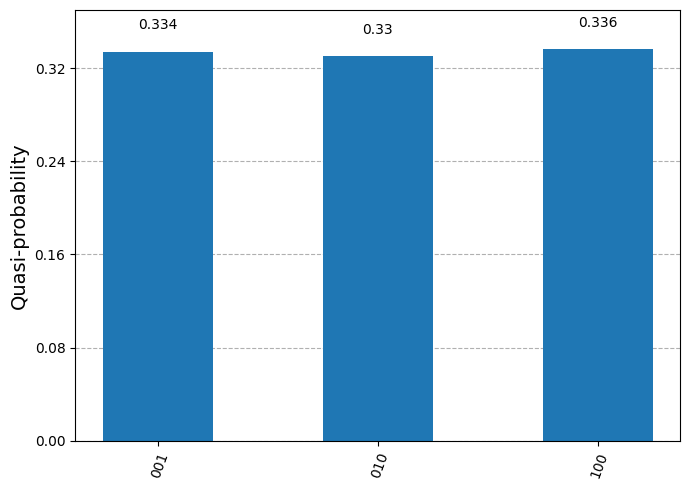

In [9]:
# Cell 09 - Wolfgang Dur (W)
# state (100,000 shots)

qc = QuantumCircuit(3)
qc.save_statevector("sv1")
qc.ry(2 * np.arccos(1 / np.sqrt(3)), 0)
qc.save_statevector("sv2")
qc.ch(0, 1)
qc.save_statevector("sv3")
qc.cx(1, 2)
qc.save_statevector("sv4")
qc.cx(0, 1)
qc.save_statevector("sv5")
qc.x(0)
qc.save_statevector("sv6")
qc.measure_all()

display(qc.draw(output="mpl"))
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=100_000).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.data(0)["sv4"]
sv5 = result.data(0)["sv5"]
sv6 = result.data(0)["sv6"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))
display(as_latex(sv5, prefix=r"\mathbf{Statevector\;5}="))
display(as_latex(sv6, prefix=r"\mathbf{Statevector\;6}="))

counts = result.get_counts(qc)
display(plot_distribution(counts))

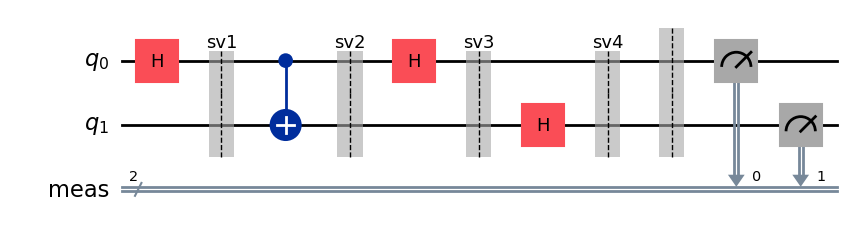

<IPython.core.display.Math object>

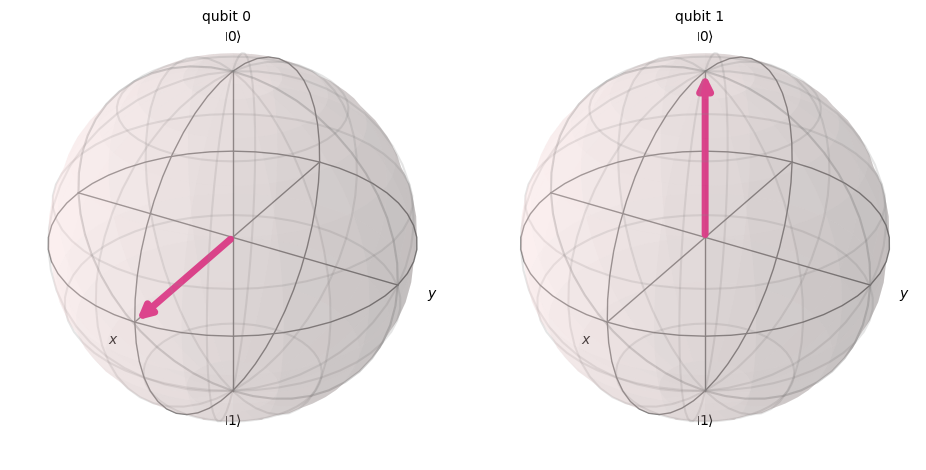

<IPython.core.display.Math object>

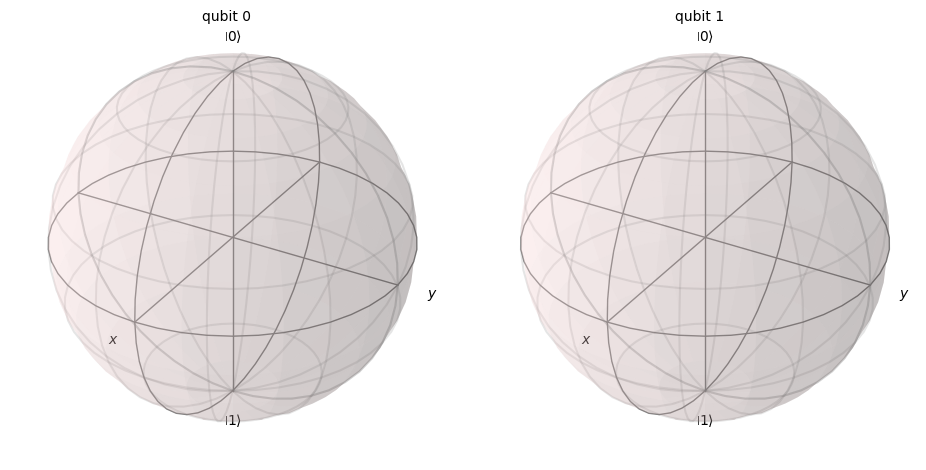

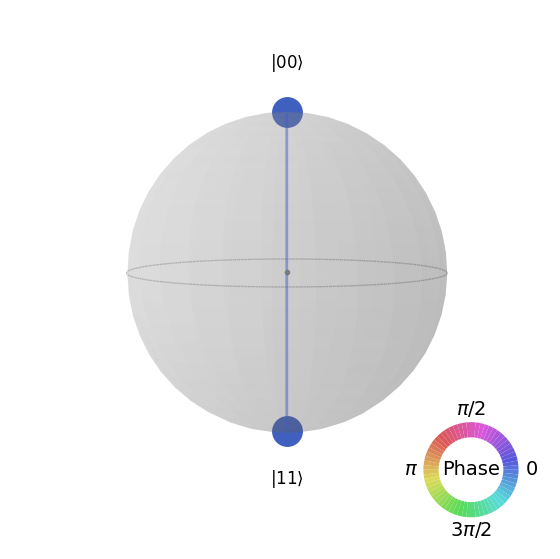

<IPython.core.display.Math object>

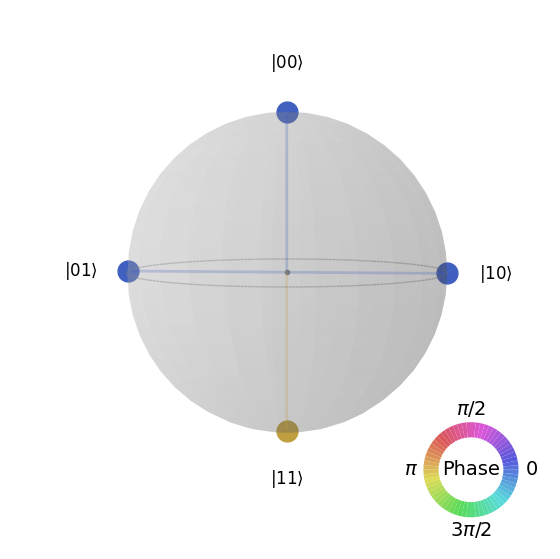

<IPython.core.display.Math object>

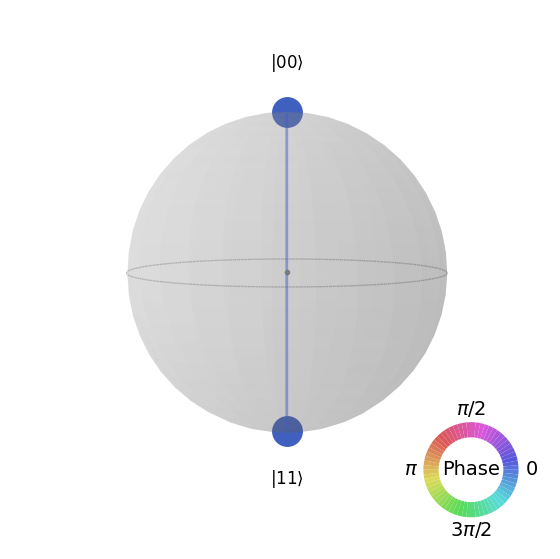

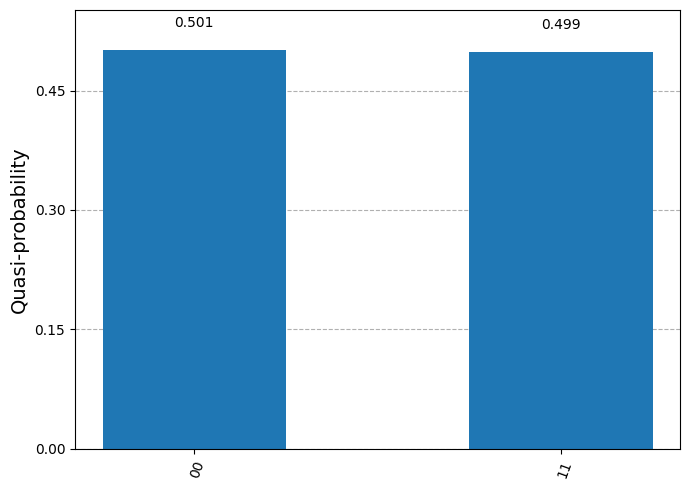

In [10]:
# Cell 10 - Hadamard after Entanglement
# (100,000 shots)

qc = QuantumCircuit(2)
qc.h(0)
qc.save_statevector("sv1")
qc.cx(0, 1)
qc.save_statevector("sv2")
qc.h(0)
qc.save_statevector("sv3")
qc.h(1)
qc.save_statevector("sv4")
qc.measure_all()

display(qc.draw(output="mpl"))
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=100_000).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.data(0)["sv4"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))

display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))
display(plot_state_qsphere(sv2))

display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(plot_state_qsphere(sv3))

display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))
display(plot_state_qsphere(sv4))

counts = result.get_counts(qc)
display(plot_distribution(counts))